In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl
from apsg import *
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)
from sys import float_info

import ipynb.fs.full.my_functions as myfuncs

In [2]:
def eig_values(matrix):
    '''
    Return eigenvalues and corresponding eigenvectors
    '''
    
    # vals = The eigenvalues in ascending order
    # vecs = The column v[:, i] is the normalized eigenvector corresponding to the eigenvalue w[i]
    vals, vecs = np.linalg.eigh(C)

    # Como o tensor é de Cauchy, os eigenvalues são a elongação quadrática recíproca
    # Para converter em Stretch (S): S = (1/L')^1/2
    S1 = np.sqrt(1/vals[0])
    V1 = vecs[:, 0]
    
    S2 = np.sqrt(1/vals[1])
    V2 = vecs[:, 1]
    
    S3 = np.sqrt(1/vals[2])
    V3 = vecs[:, 2]
    
    return S1, S2, S3

def eig_vecs(matrix):
    '''
    Return eigenvalues and corresponding eigenvectors
    '''
    
    # vals = The eigenvalues in ascending order
    # vecs = The column v[:, i] is the normalized eigenvector corresponding to the eigenvalue w[i]
    vals, vecs = np.linalg.eigh(C)

    # Como o tensor é de Cauchy, os eigenvalues são a elongação quadrática recíproca
    # Para converter em Stretch (S): S = (1/L')^1/2
    S1 = np.sqrt(1/vals[0])
    V1 = vecs[:, 0]
    
    S2 = np.sqrt(1/vals[1])
    V2 = vecs[:, 1]
    
    S3 = np.sqrt(1/vals[2])
    V3 = vecs[:, 2]
    
    return V1, V2, V3

###### Função para adicionar linha identitdade não importa os limites dos eixos
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

# Function to prevent zero values in an array
def preventDivisionByZero(some_array):
    corrected_array = some_array.copy()
    for i, entry in enumerate(some_array):
        # If element is zero, set to some small value
        if abs(entry) < float_info.epsilon:
            corrected_array[i] = float_info.epsilon
    
    return corrected_array

# def forward(x):
#     return np.rad2deg(np.arctan(x)) 


# def inverse(x):
#     return np.rad2deg(np.arctan(x))

def PhitoGamma(phi):
    gamma = np.tan(np.deg2rad(phi))
    return gamma


def GammatoPhi(gamma):
    phi = np.rad2deg(np.arctan(gamma))
    return phi

## Quais implicações de uma compressão uniaxial antes da deformação por cisalhamento simples?

Assumiremos a fábrica sedimentar achatada uniaxialmente na direção Z (vertical) e posterior deformação por Cisalhamento Simples

A matriz de achatamento uniaxial em Z é dada pela Matrz UC, onde $F_Z$ é o valor de compressão.

$$ UC = 	\begin{matrix}
 & \textbf{EE} & \textbf{YY} & \textbf{ZZ} \\
\textbf{EE} & 1 & 0 & 0\\
\textbf{YY} &0 & 1 & 0 \\
\textbf{ZZ} &0 & 0 & F_Z
\end{matrix} $$

A matriz de cisalhamento simples é dada por CS

$$ CS = 	\begin{matrix}
 & \textbf{EE} & \textbf{YY} & \textbf{ZZ} \\
\textbf{EE} & 1 & \gamma & 0\\
\textbf{YY} &0 & 1 & 0 \\
\textbf{ZZ} &0 & 0 & 1
\end{matrix} $$

Onde $\gamma = tan(\psi)$, sendo $\psi$ o ângulo de cisalhamento simples

Considerando as transformações sucessivas, temos que nossa matriz $F$ final será dada por

$$F = CS*UC$$

**A ideia é variar valores de $F_z$ (intensidade de compressão uniaxial) e variar os valores de $\psi$ e ver como varia o Ellipsoide de forma final**

## Tensor de Cauchy (C)

$$C = (F^{-1})^{T} * F^{-1}$$

onde $F^{-1}$ indica a matriz inversa de F. A Matriz $C$ fornece a elongação quadrática recíproca $\lambda' = \frac{1}{\lambda}$ de uma linha na direção de um vetor unitário com orientação $x=(X_1, X_2, X_3)$, no **estado final deformado.**

Os autovetores de $C$ fornecem as orientações das linhas que compôem os eixos principais de deformação no **estado deformado**, e os seus autovalores fornecerão as elongações quadráticas recíprocas principais ($\lambda_1'$, $\lambda_2'$, $\lambda_3'$) associadas a esses eixos

#### Compressão Uniaxial e Cisalhamento Simples

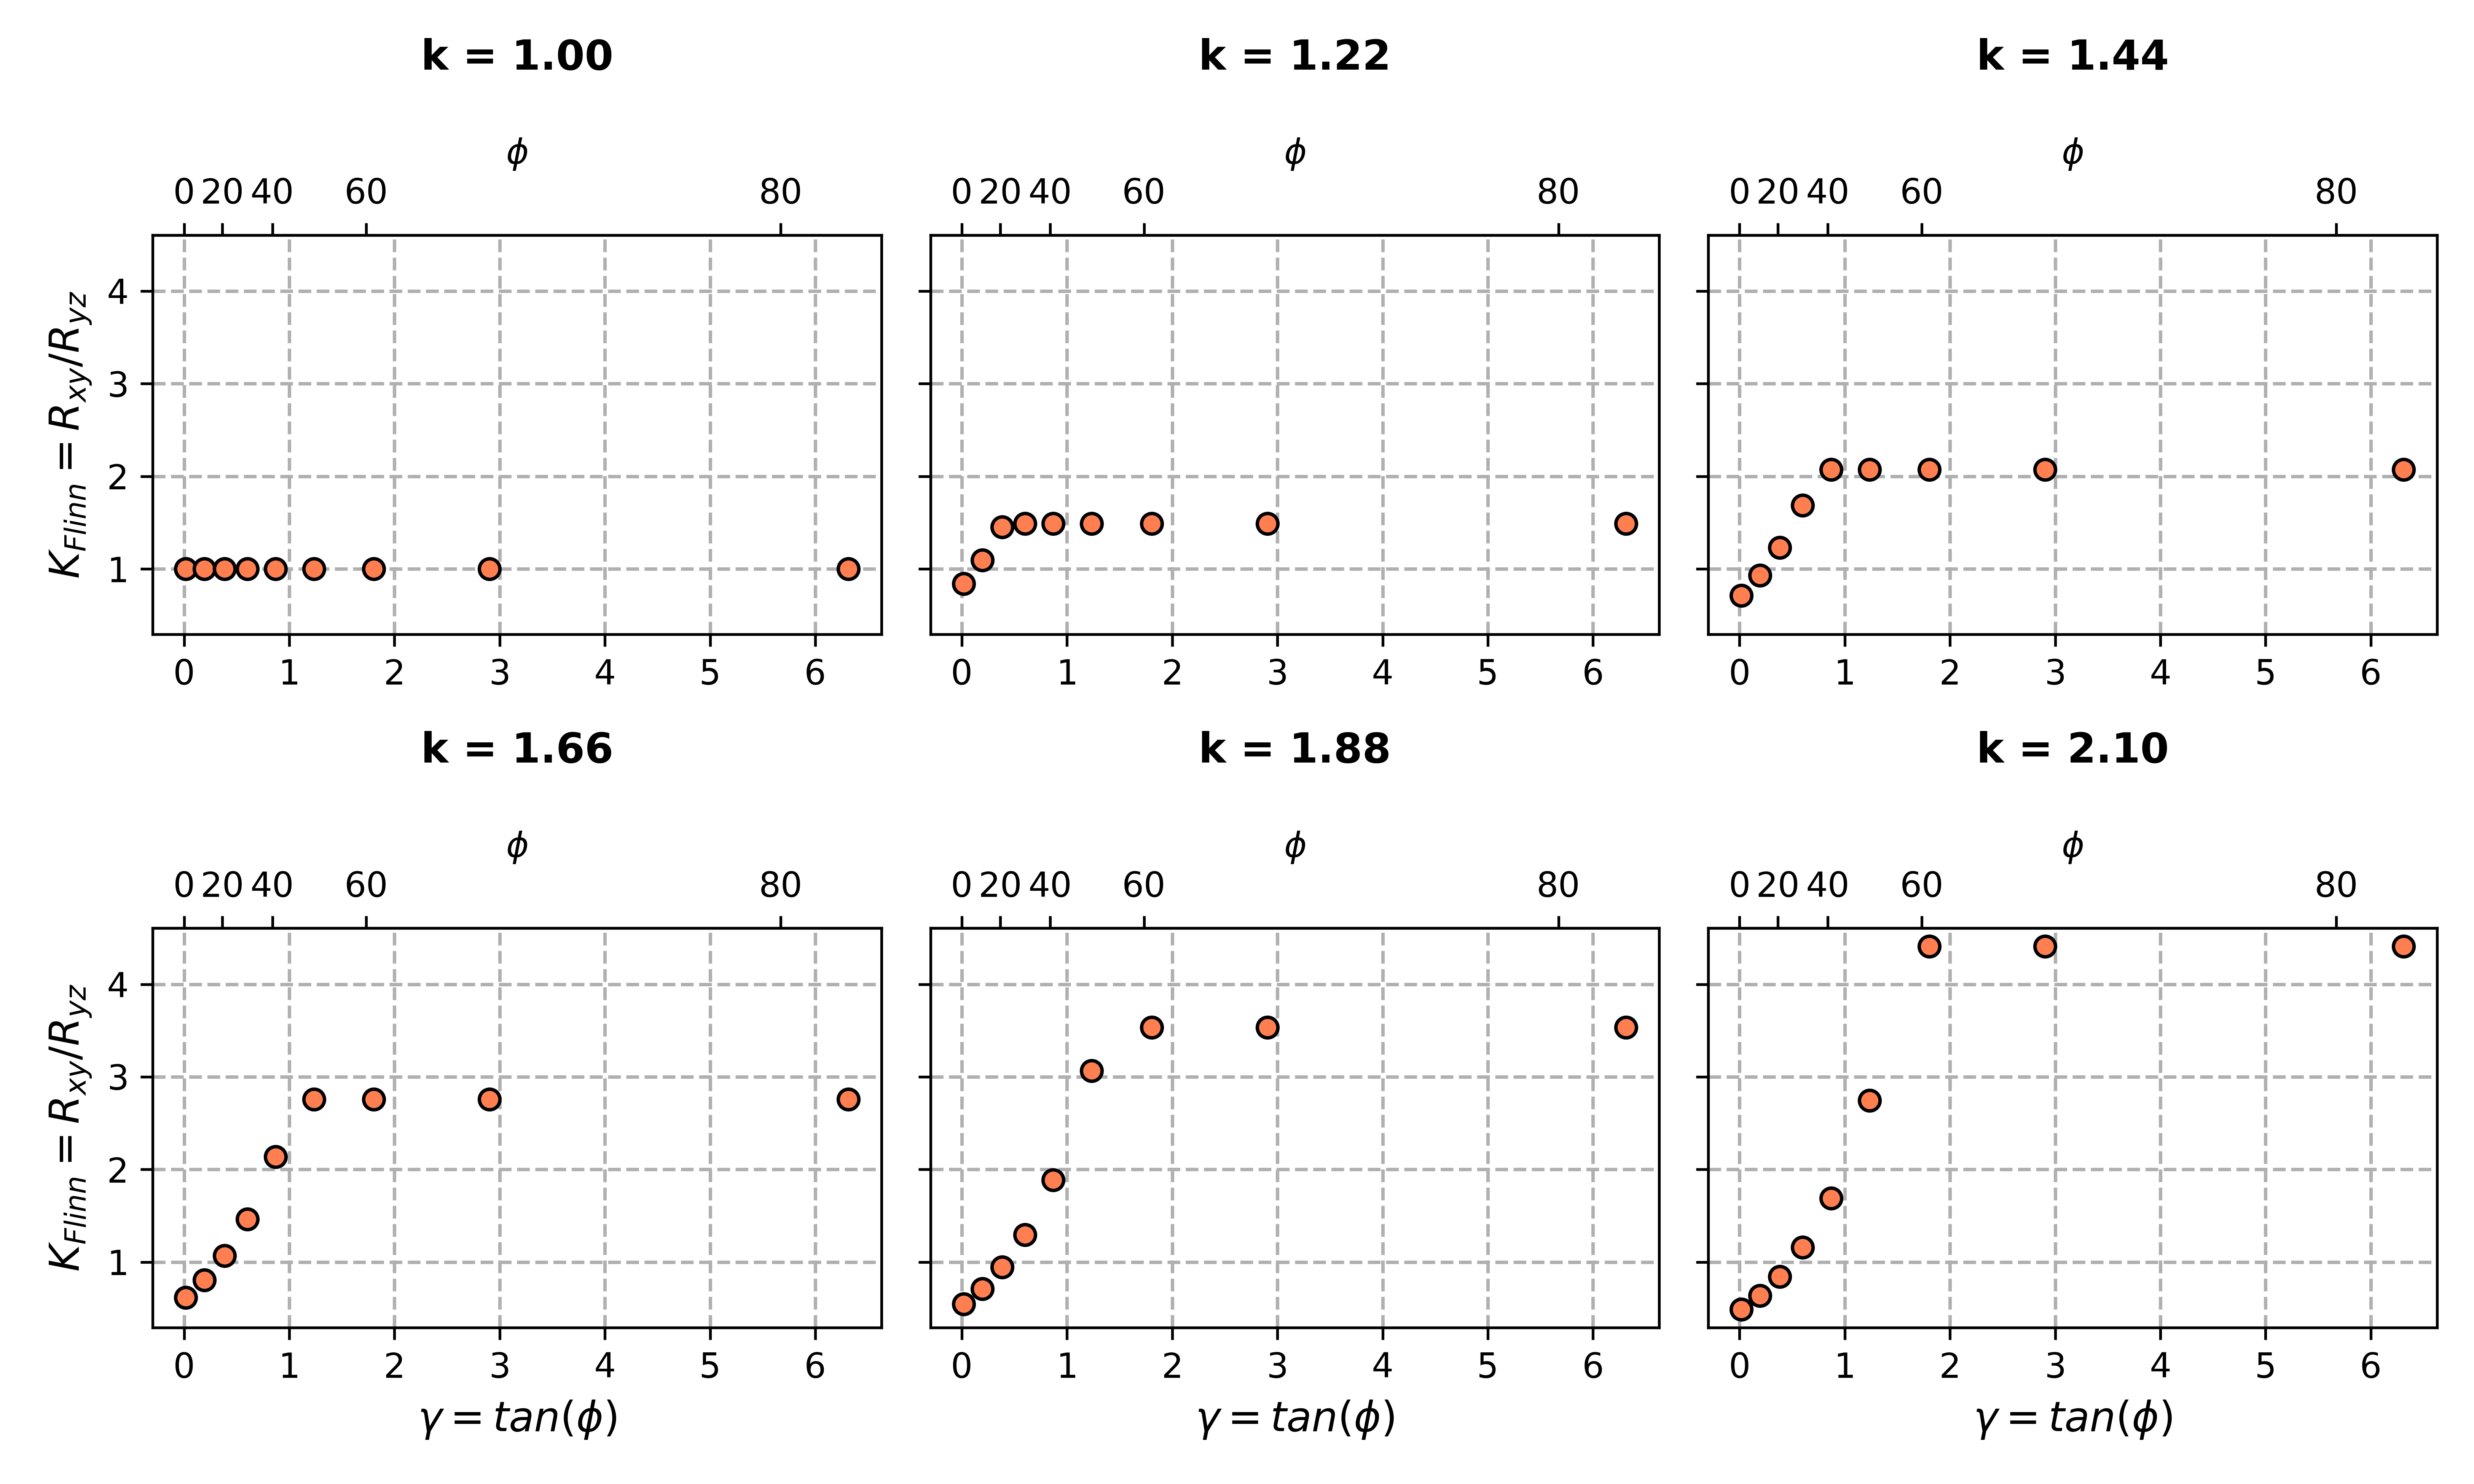

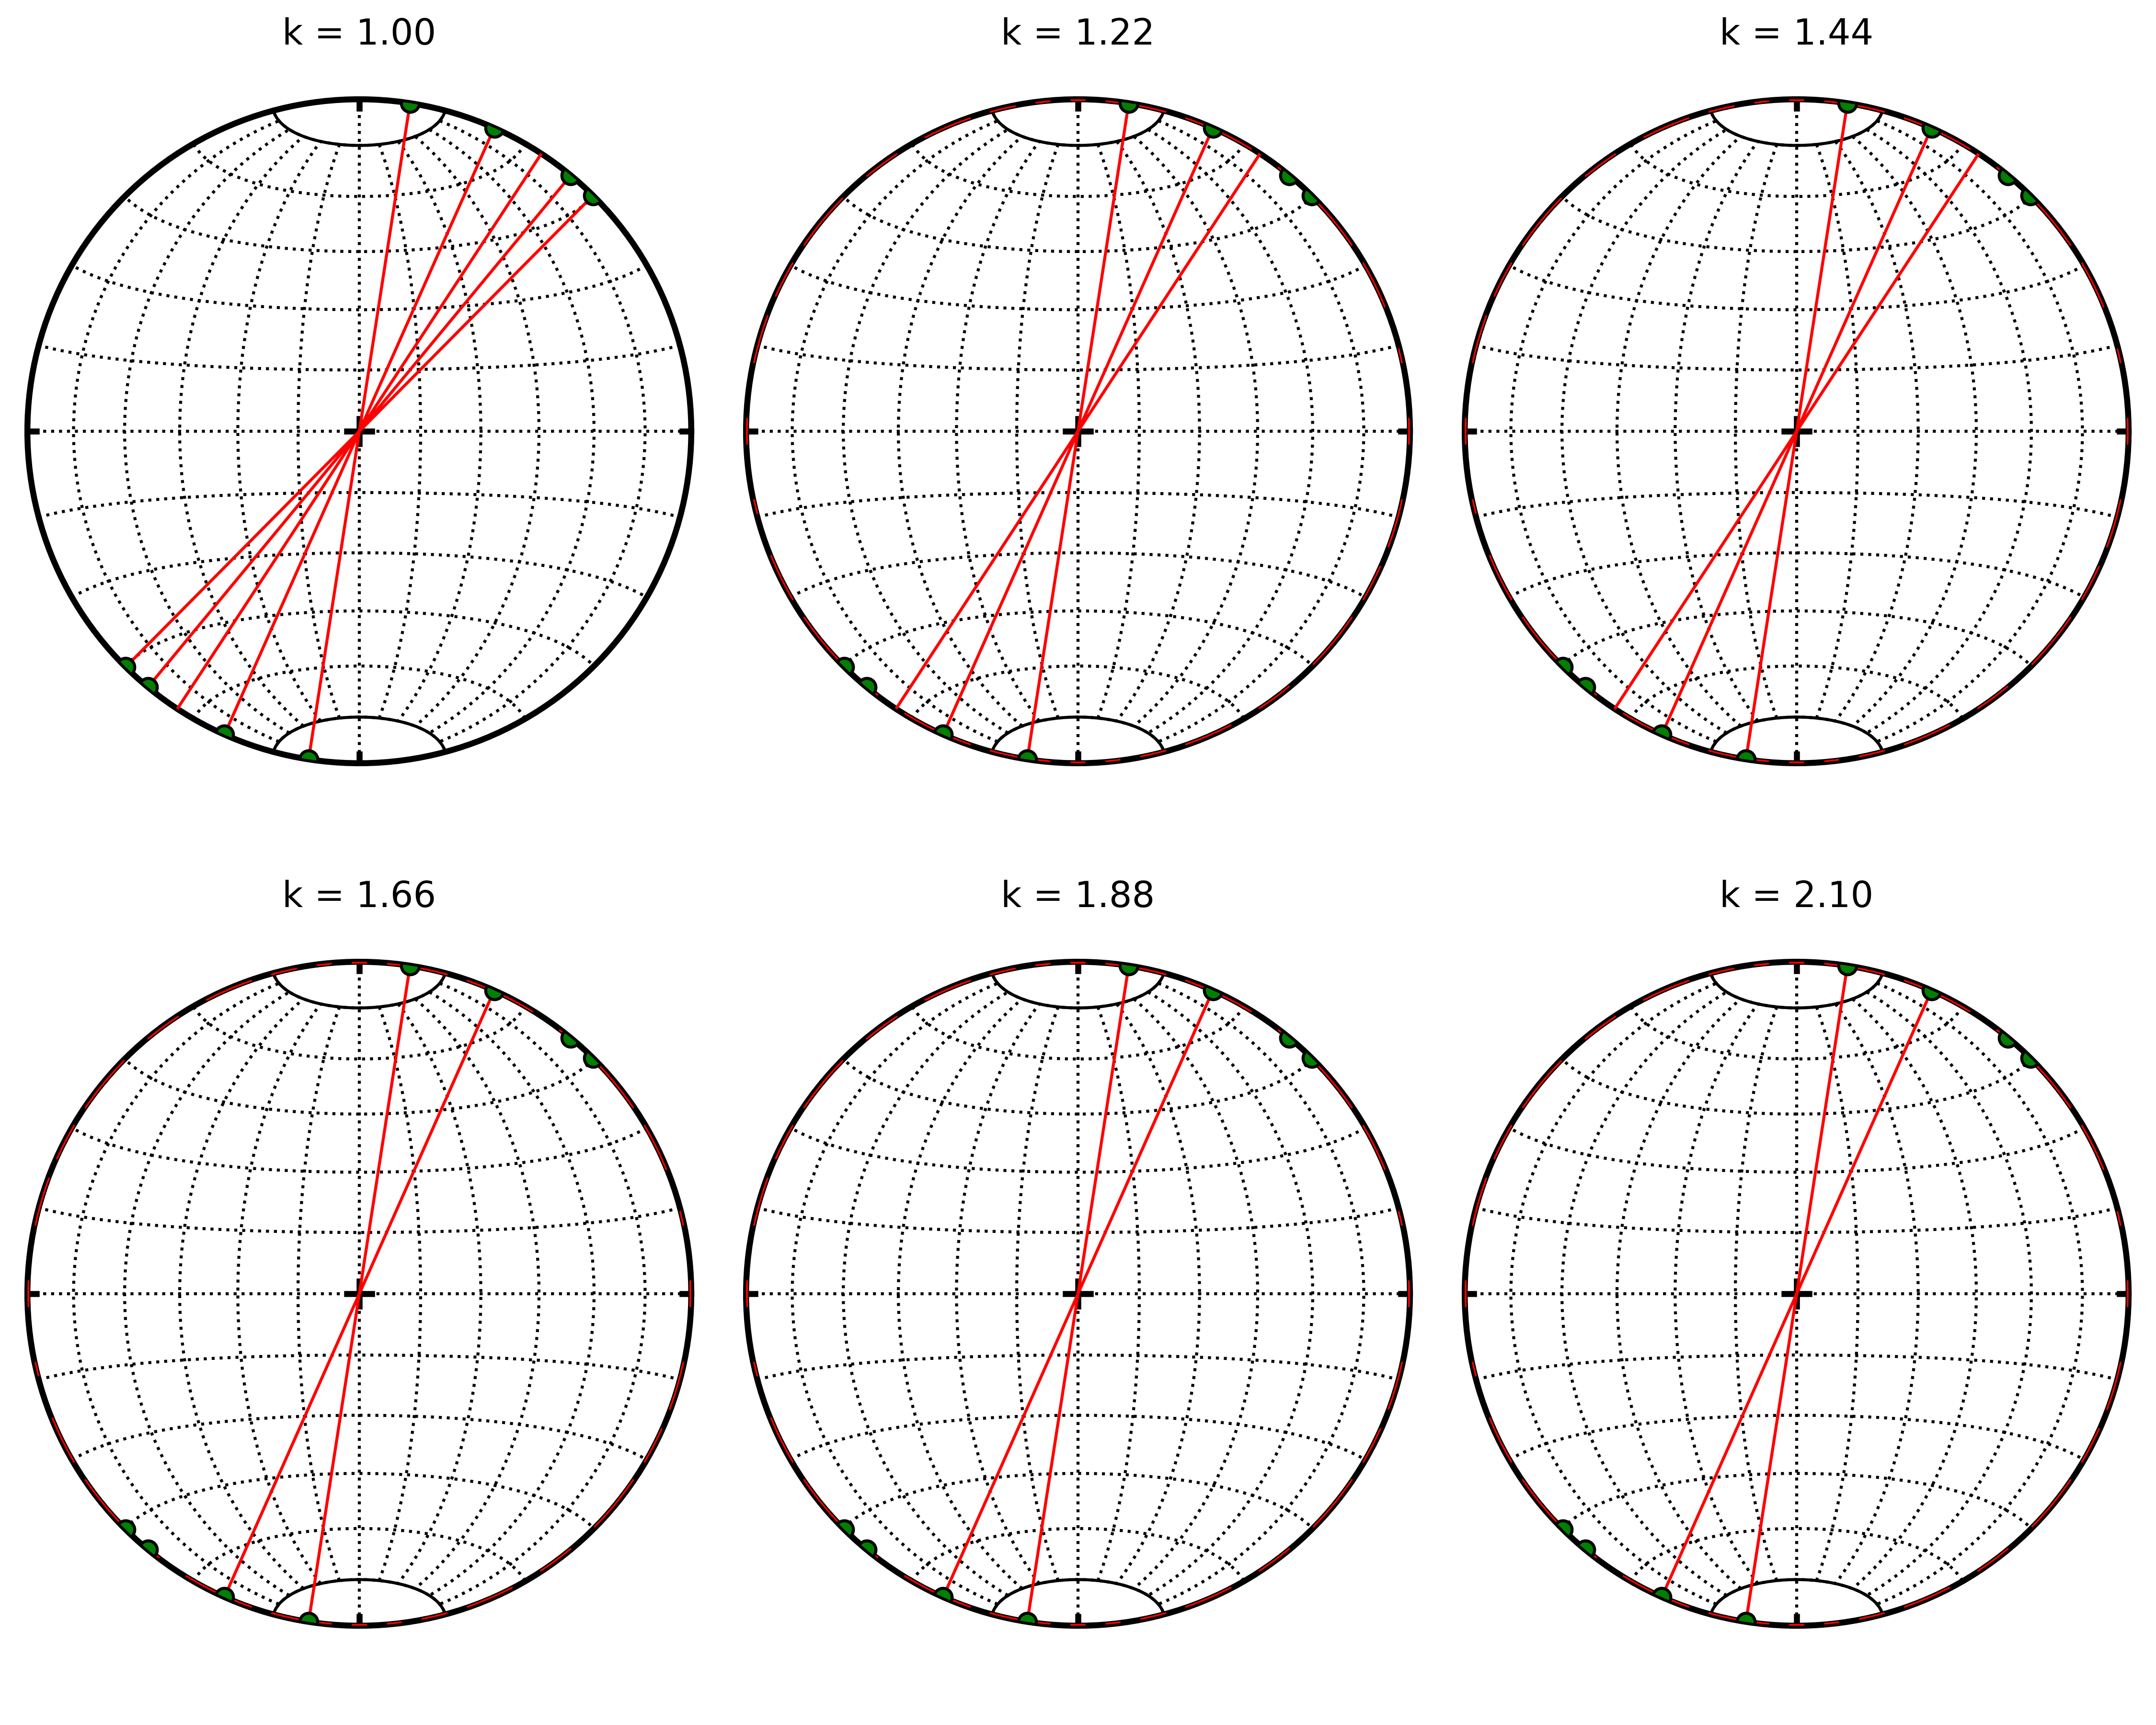

## Compressão Uniaxial e Cisalhamento Puro

#### Compressão de Cisalhamento Puro em Z

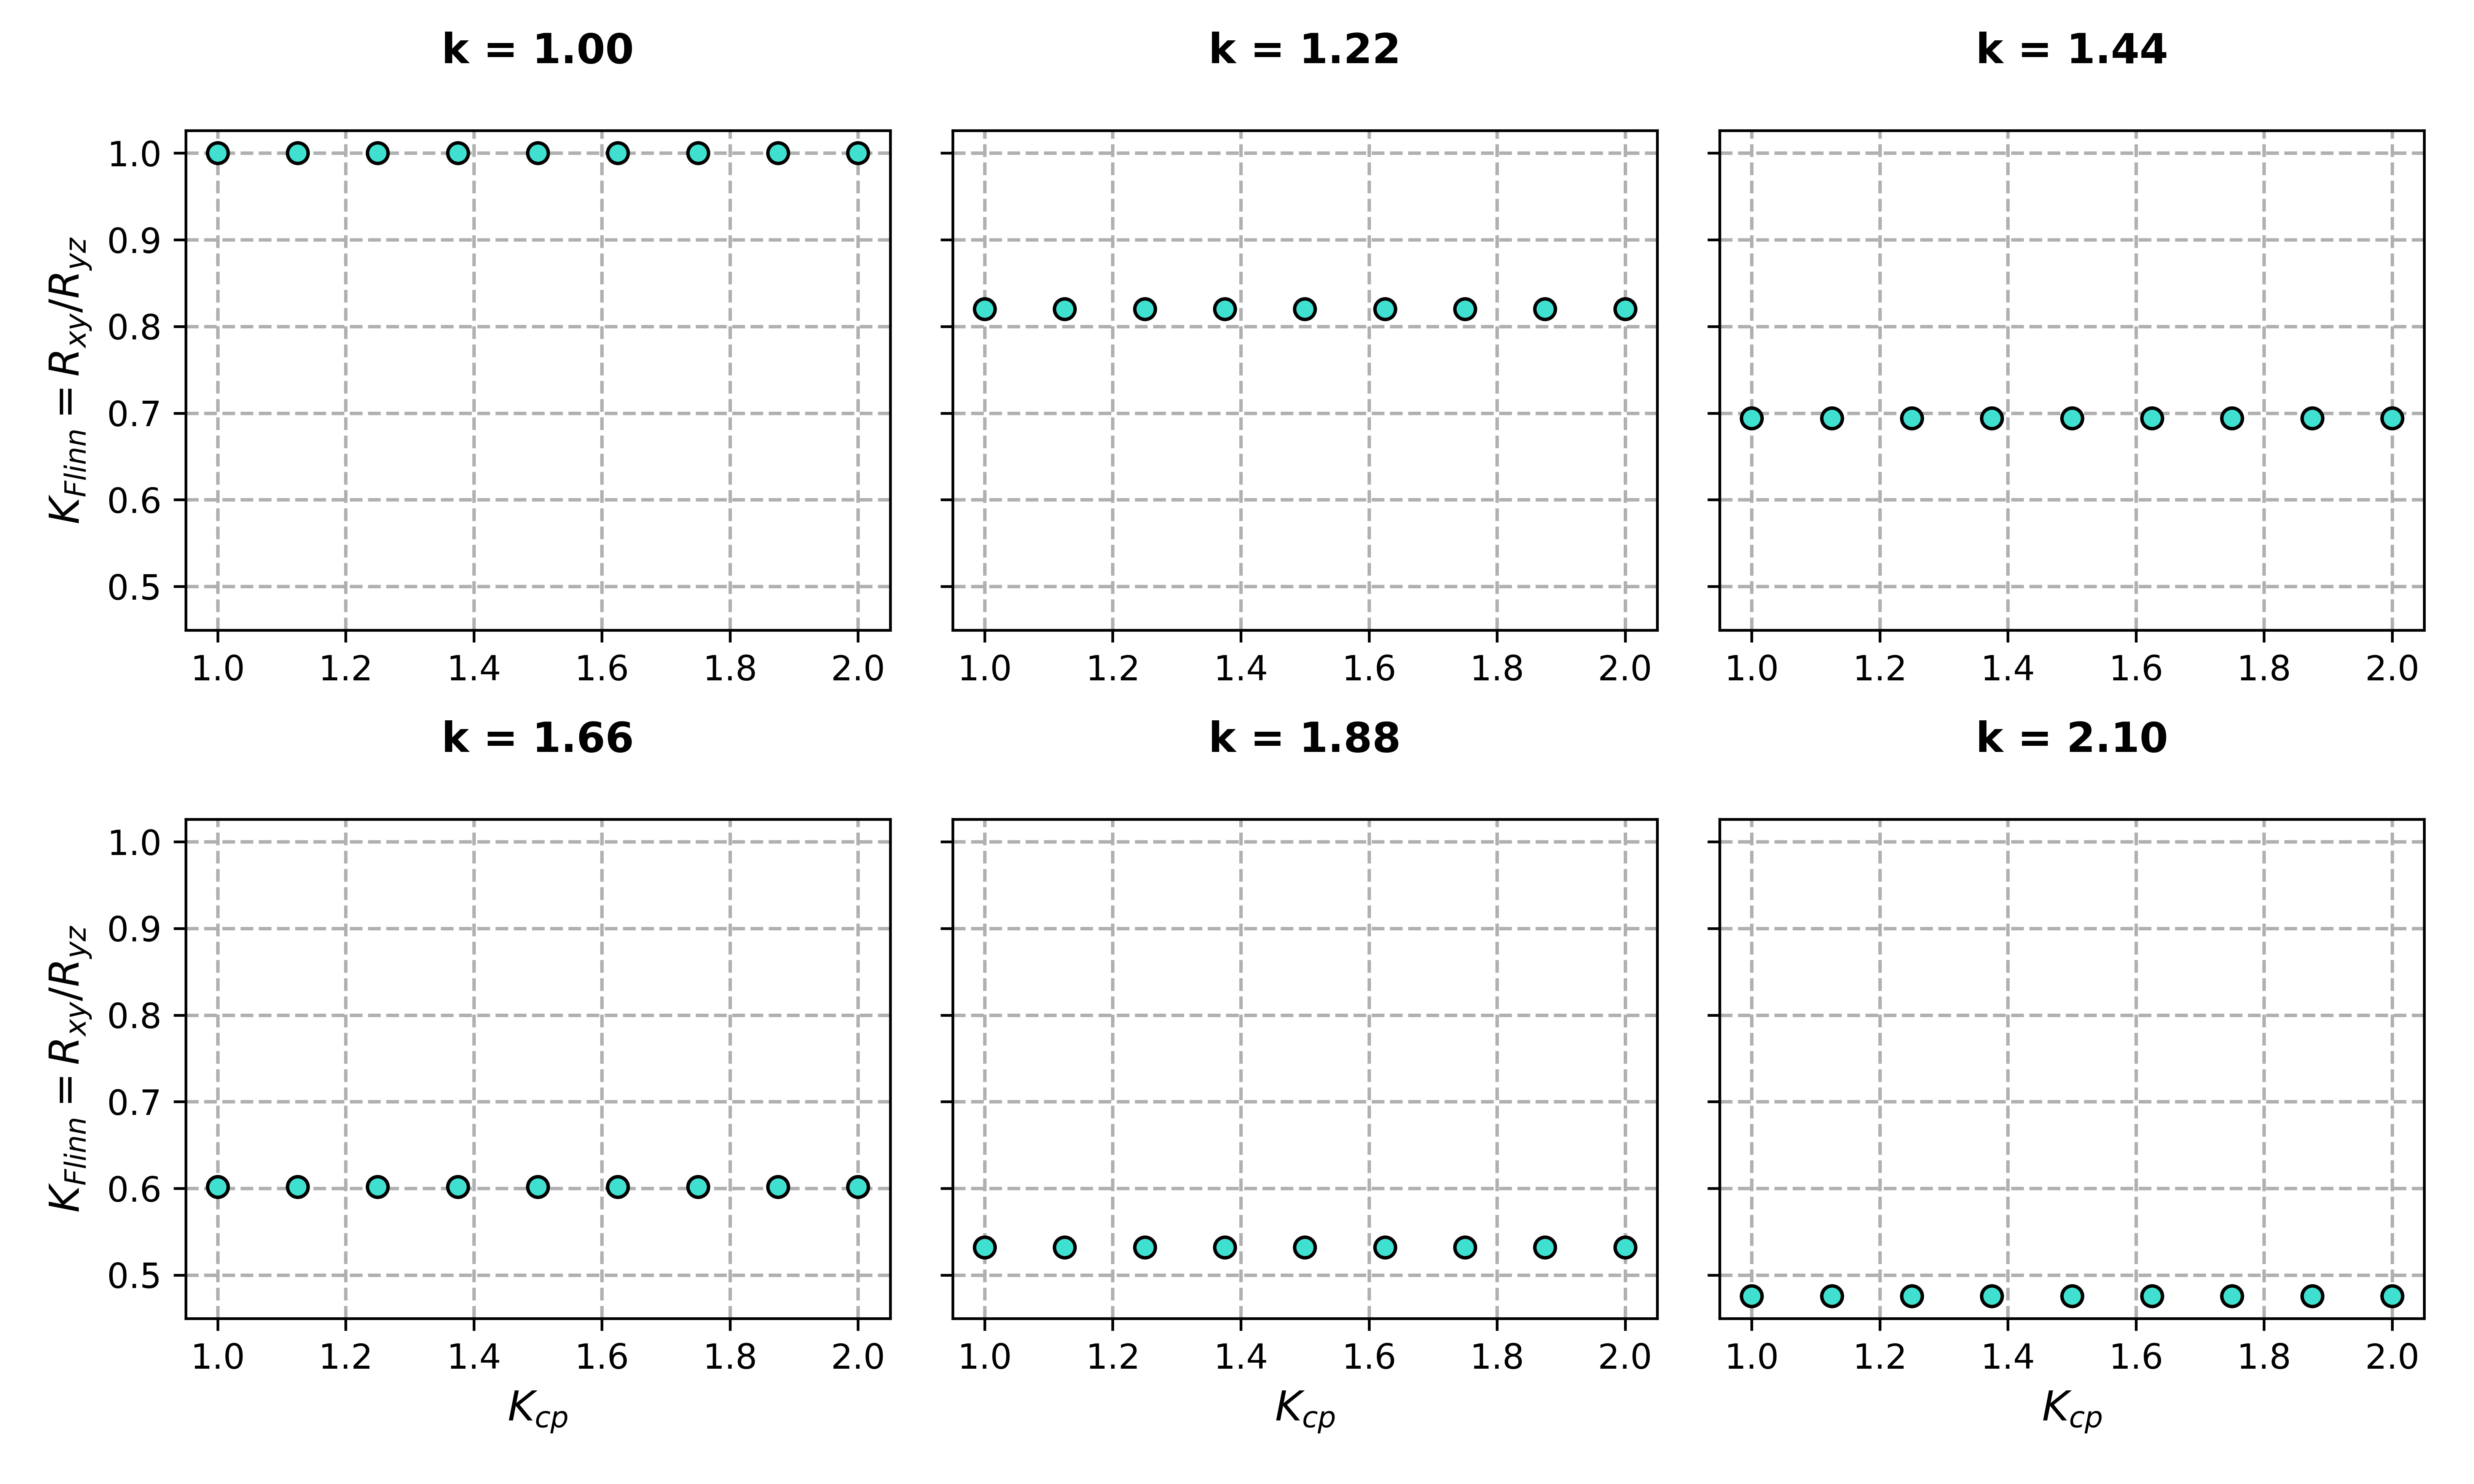

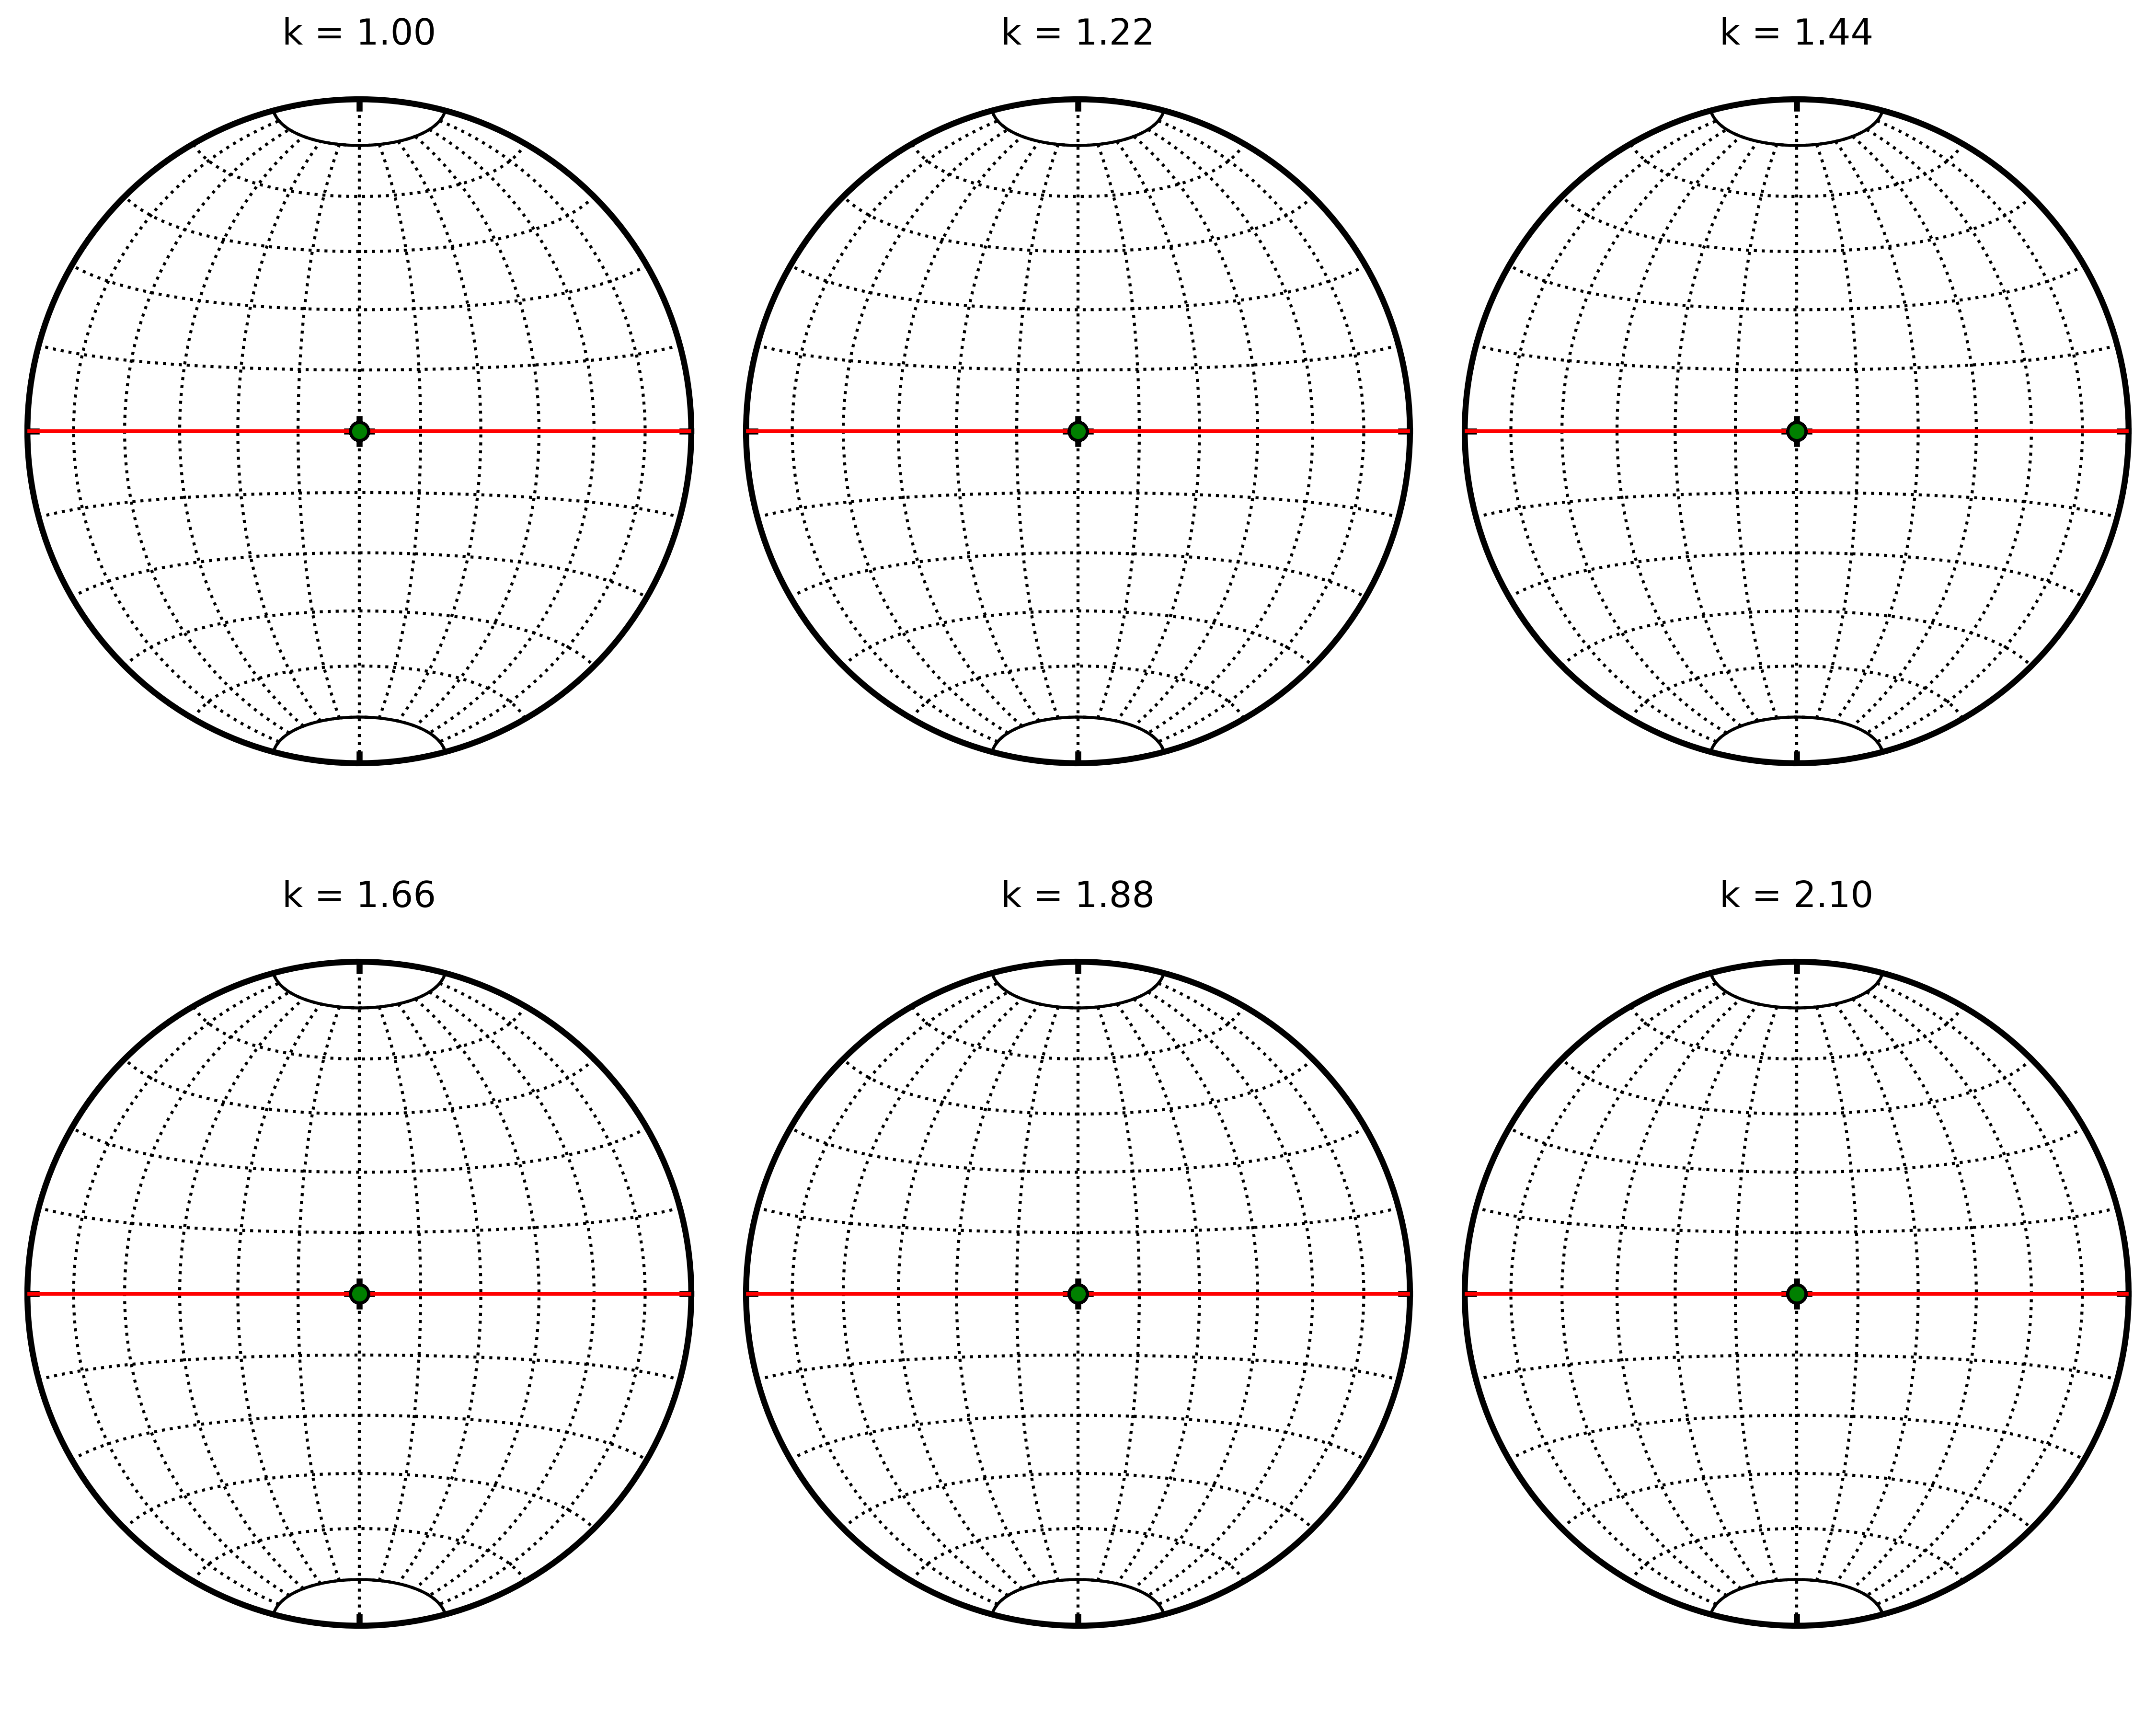

#### Compressão de Cisalhamento Puro em X

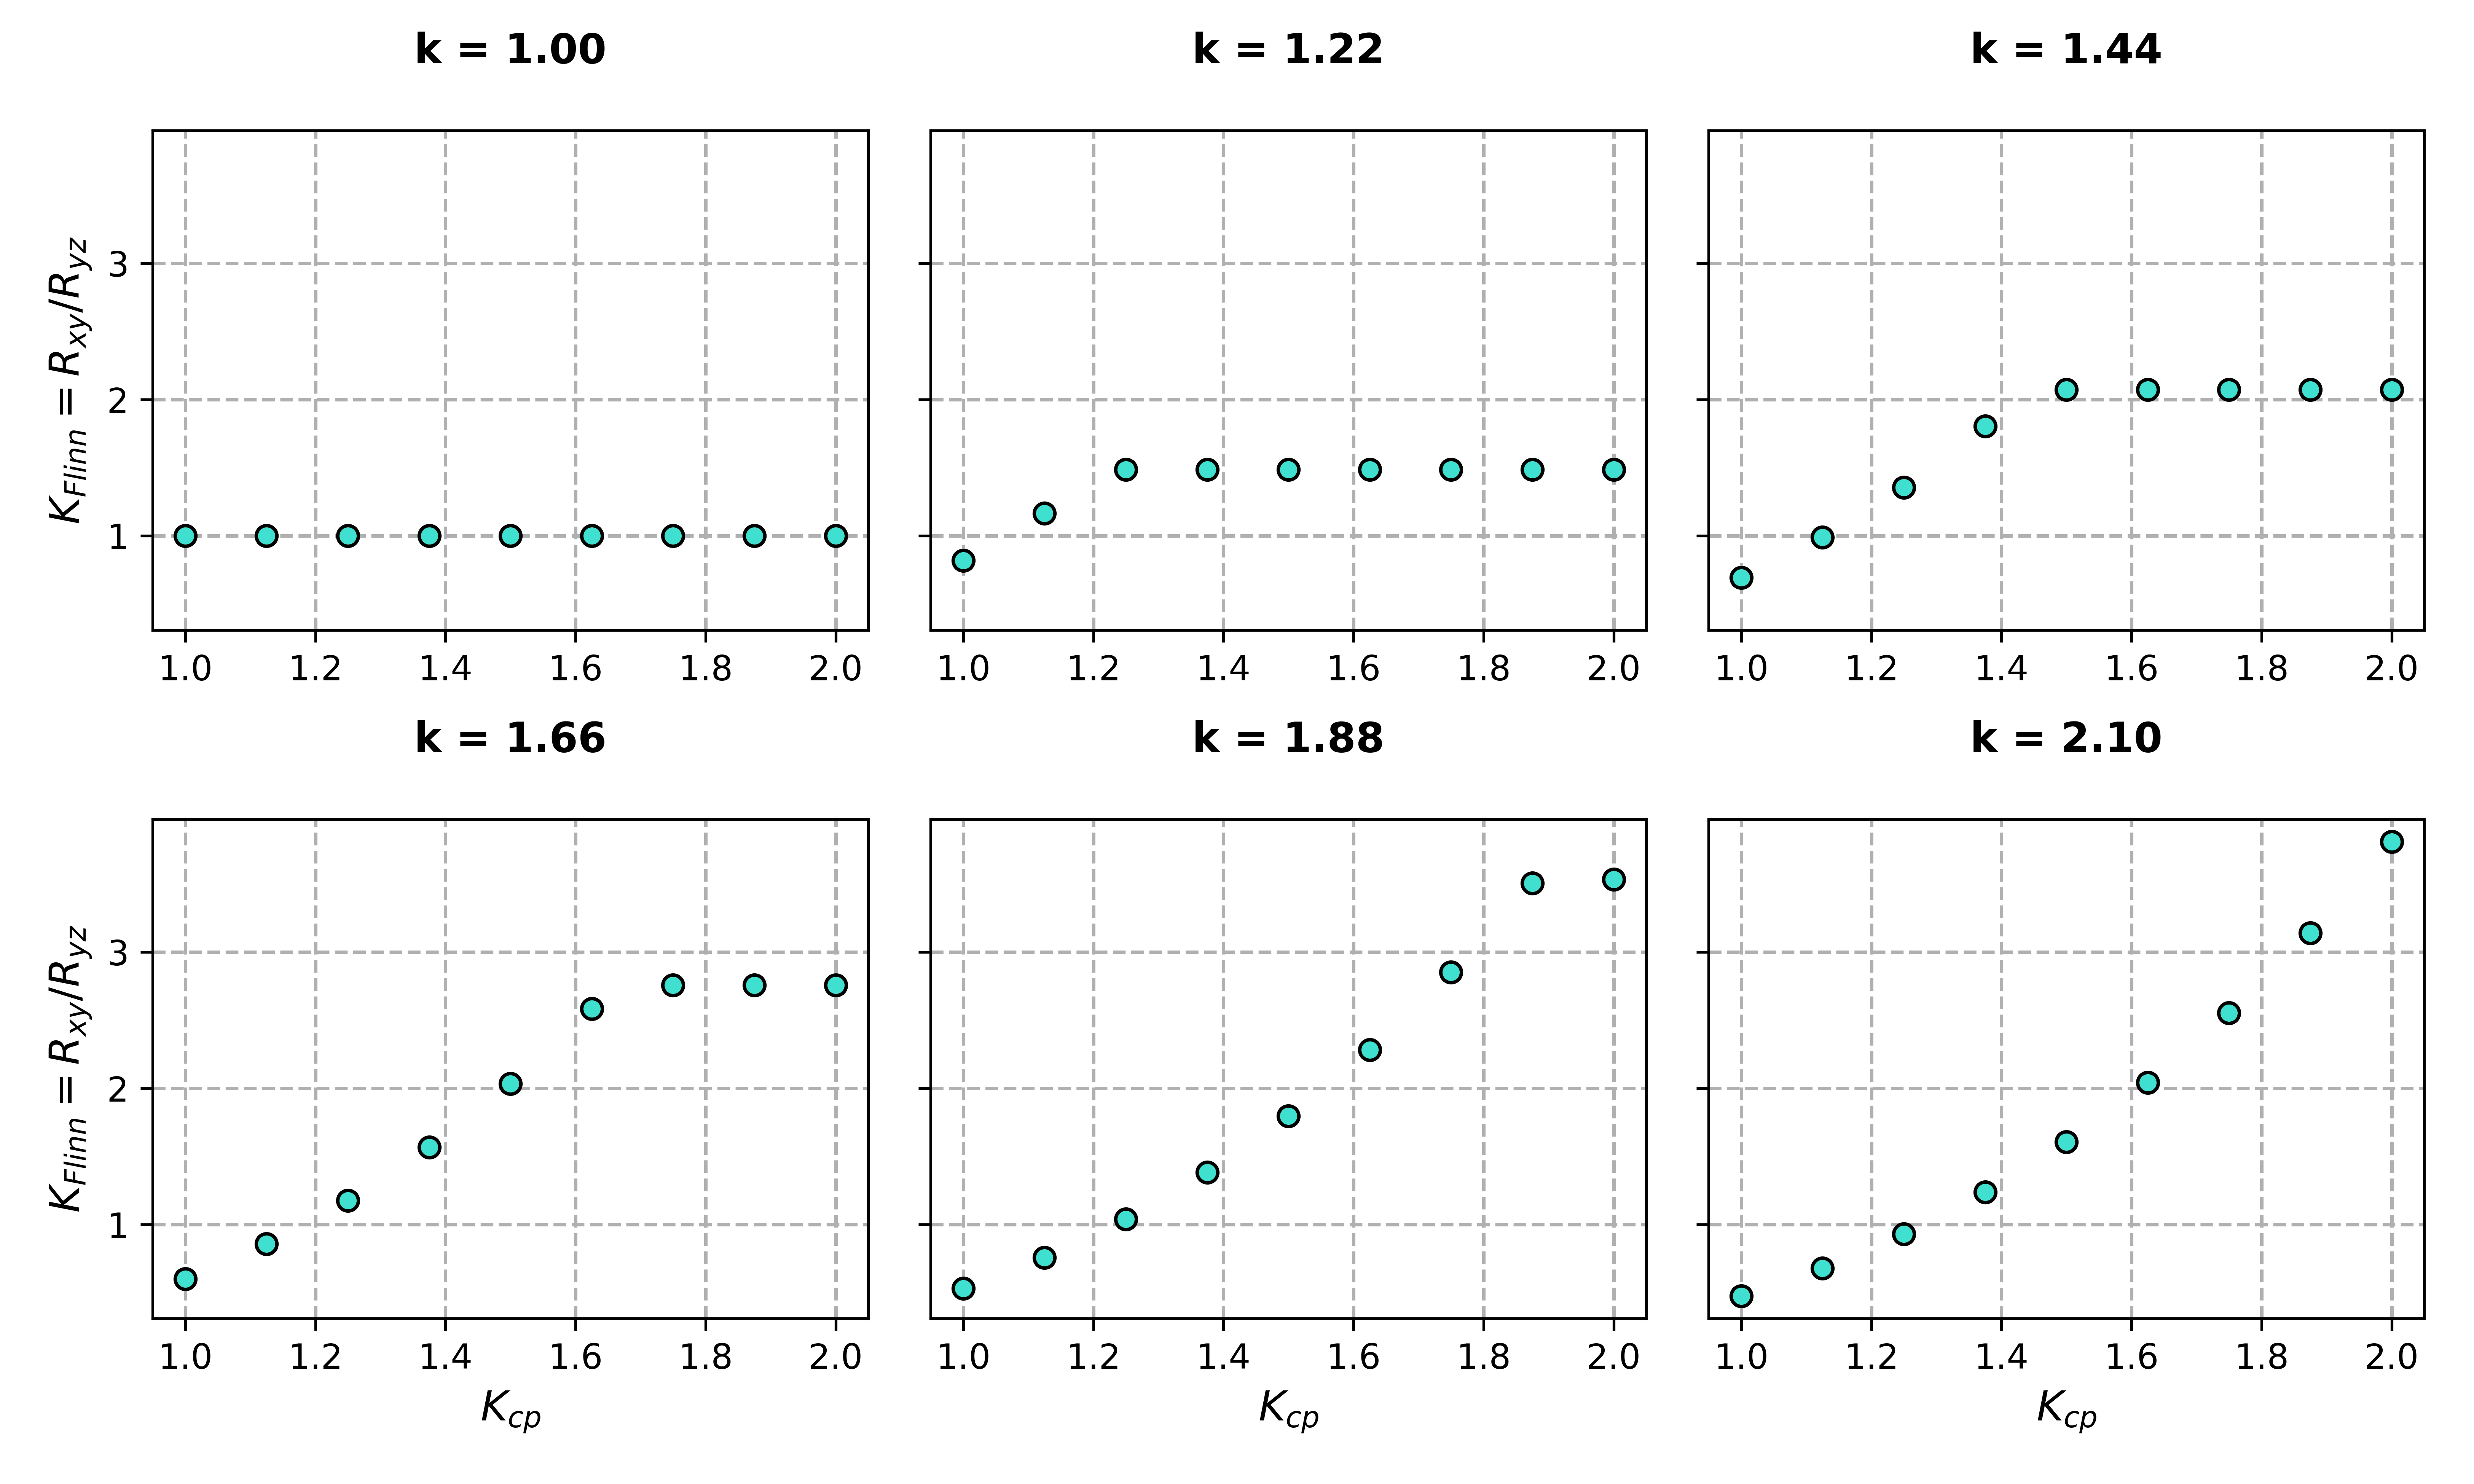

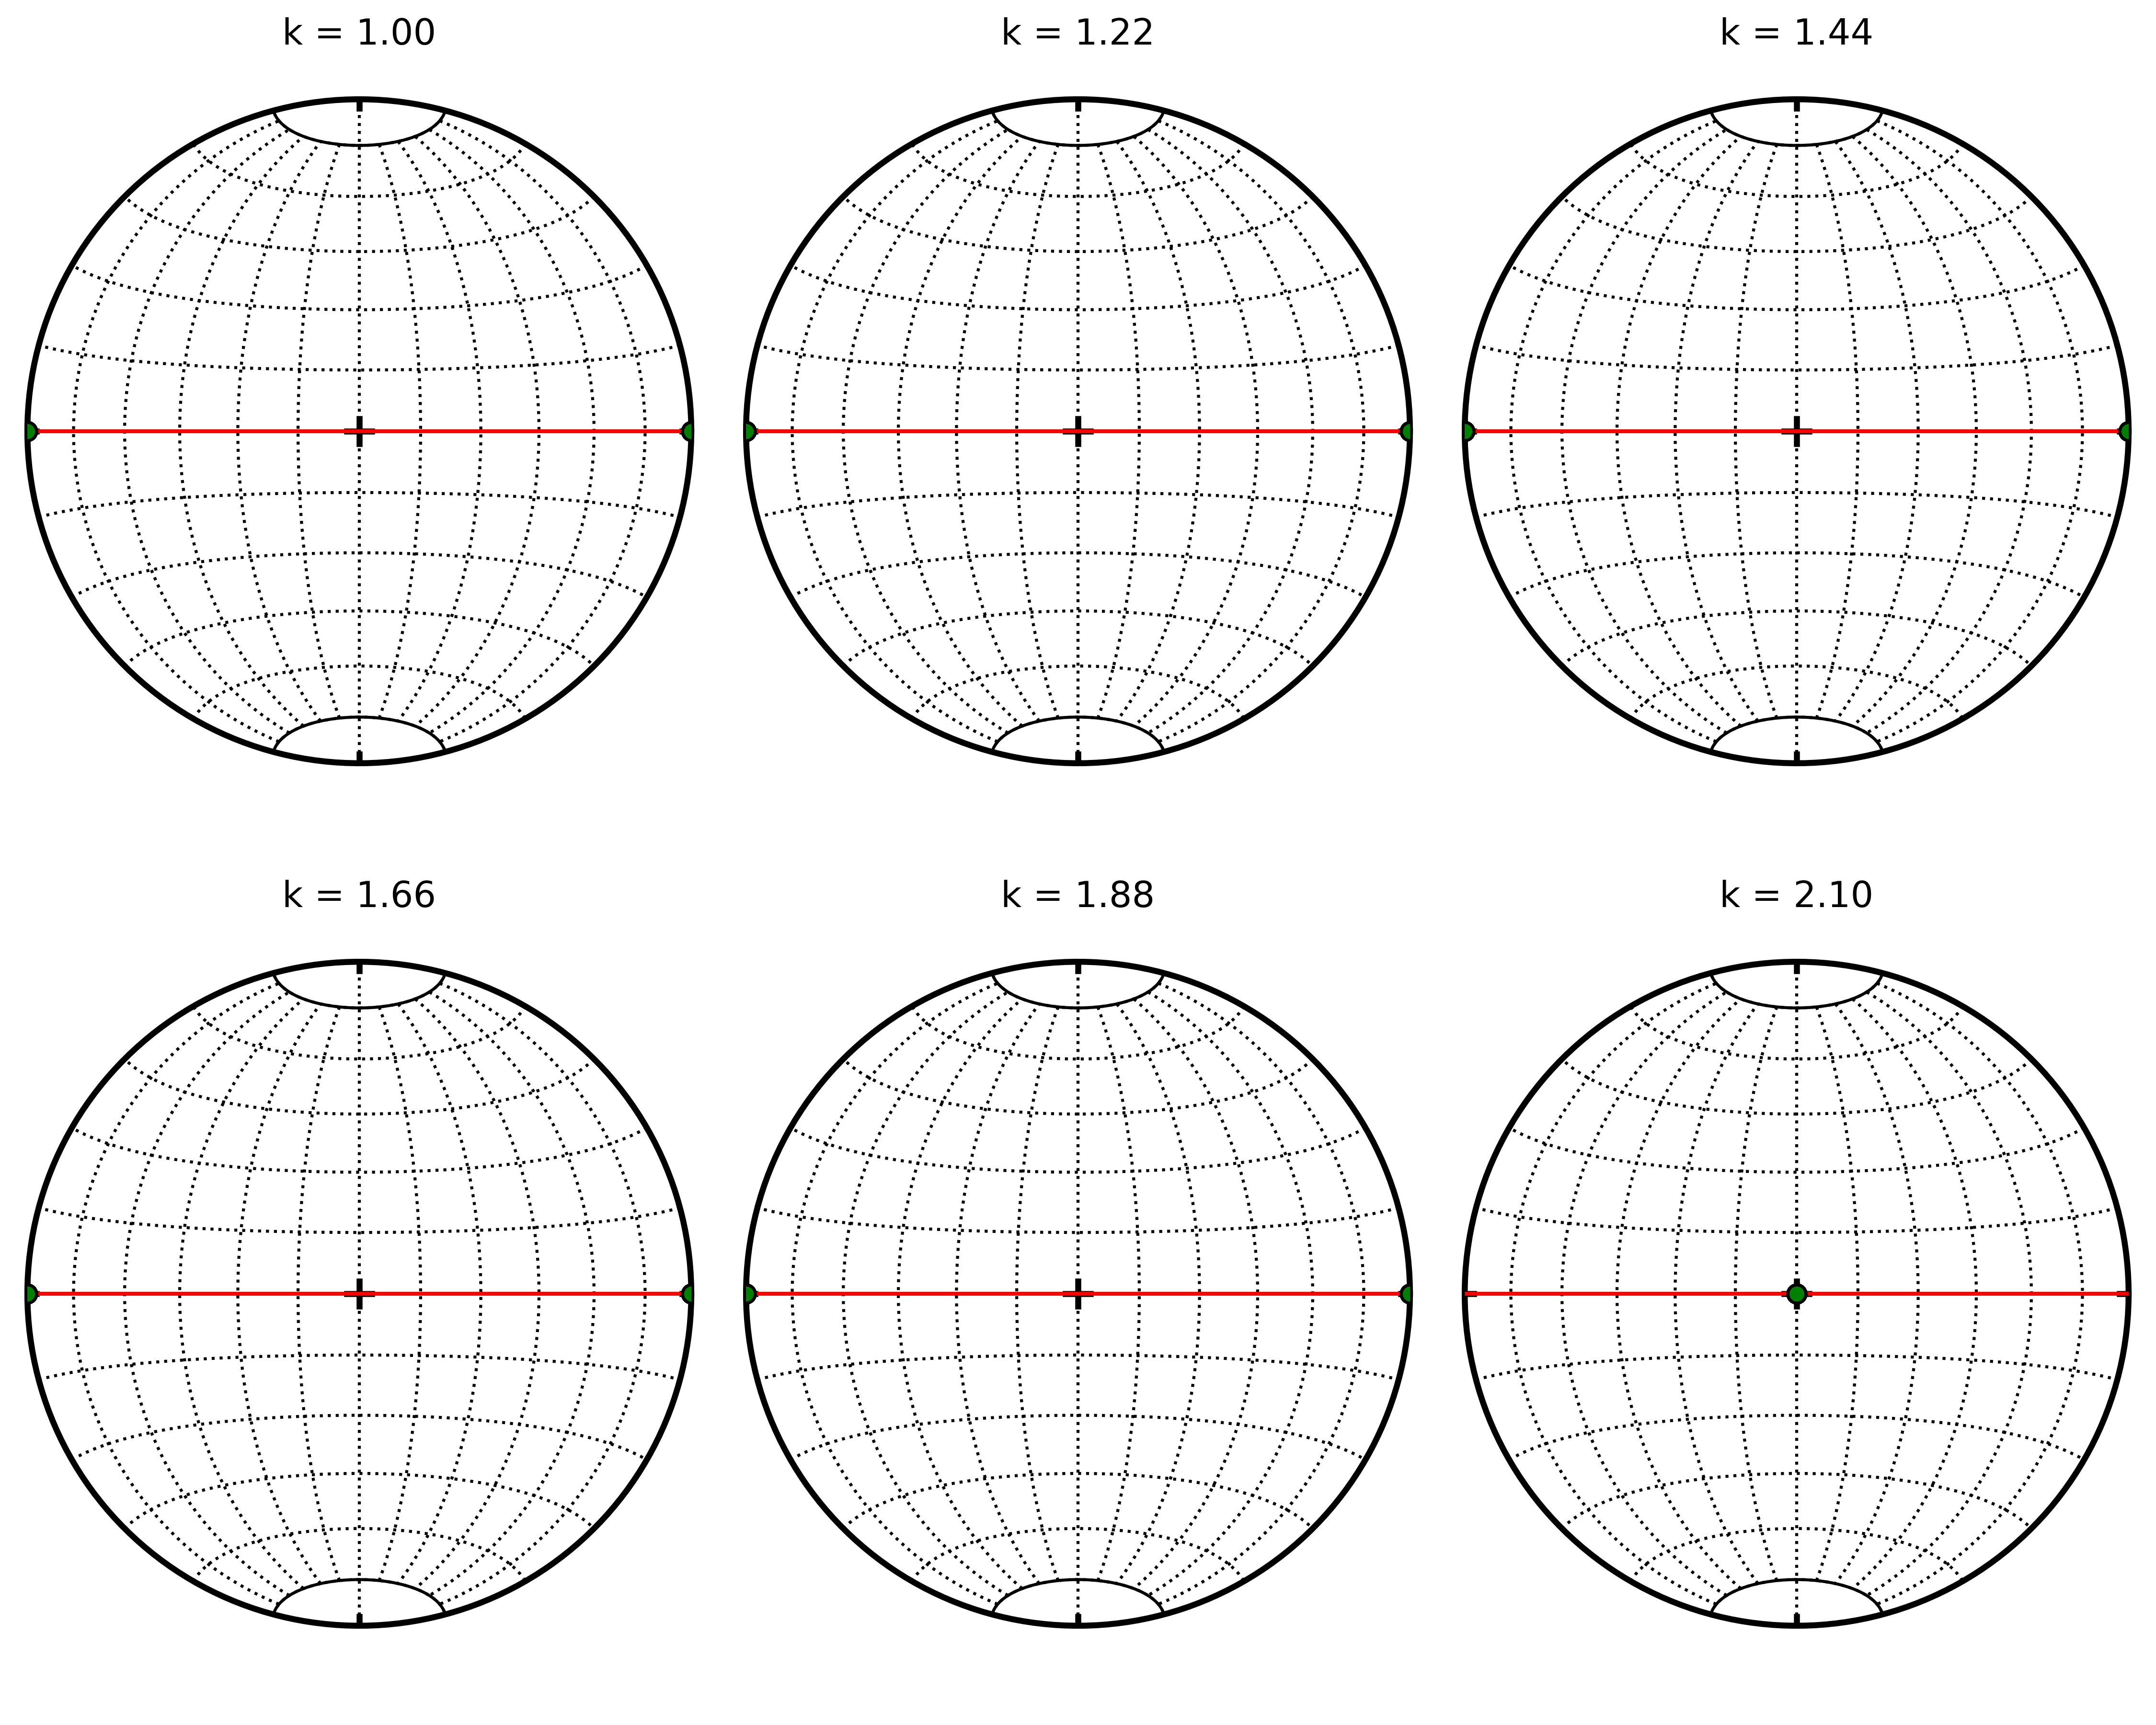

# Código para Modelagem das Matrizes.
#### Compressão Uniaxial e Cisalhamento Simples

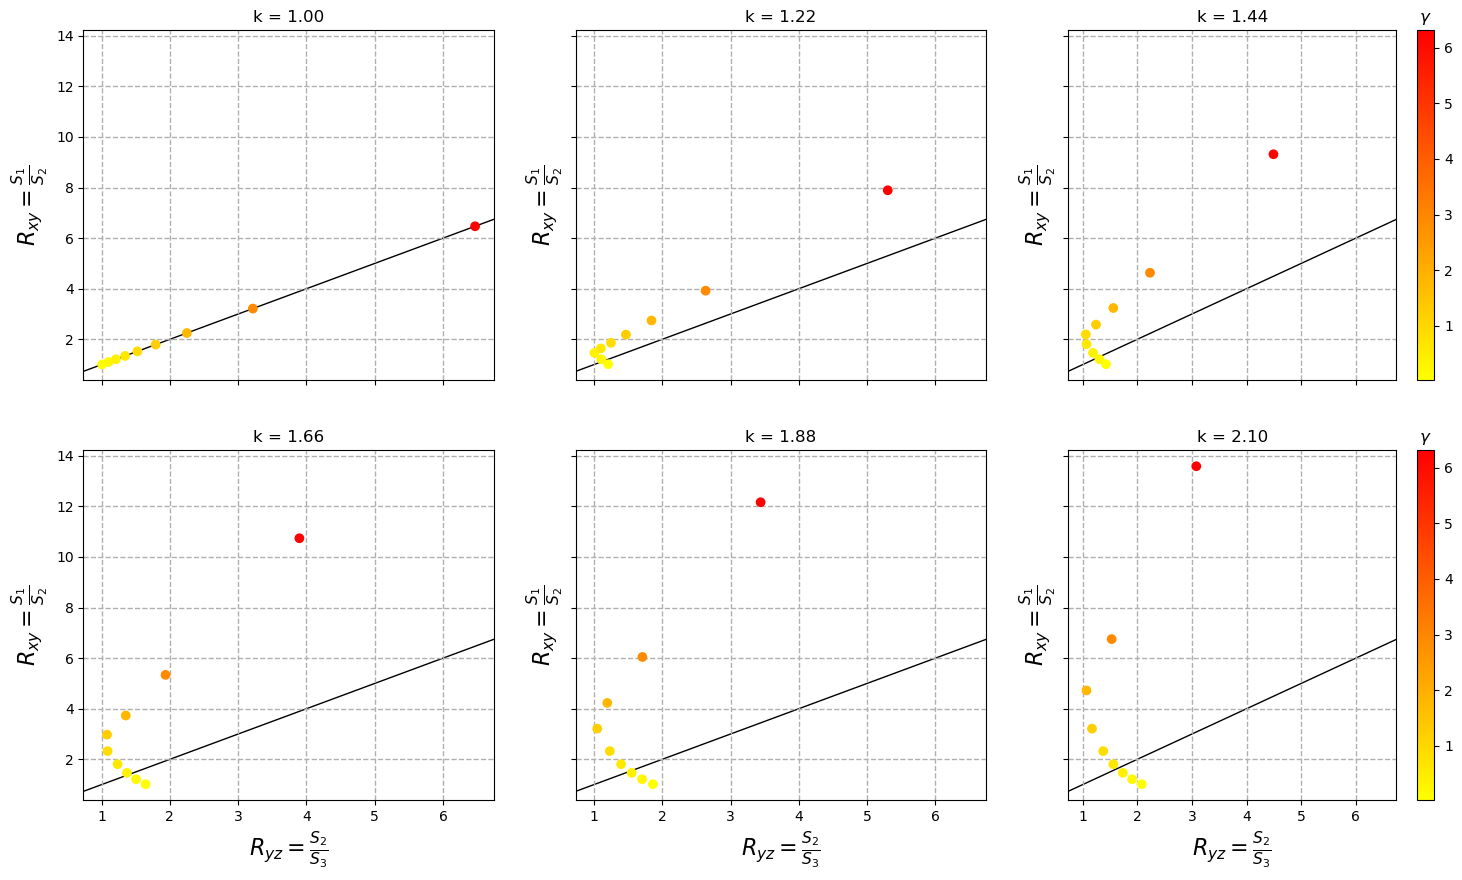

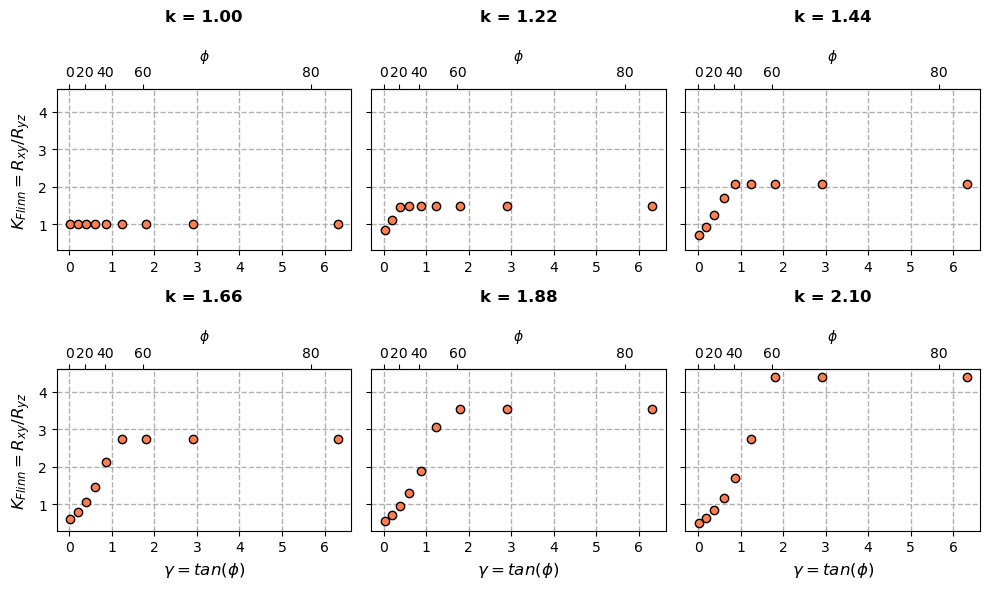

In [14]:
# Definição de figuras
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,10), sharex=True, sharey=True)
f2, ax2 = plt.subplots(nrows=2, ncols=3, figsize=(10,6), sharex=False, sharey=True)

#colormap = cm.get_cmap('autumn_r', 6)


# listas para guardar valores
k_values = []
psi_values = []
S1_values = []
S2_values = []
S3_values = []
V1_values = []
V2_values = []
V3_values = []

# valores para variar em k
ks = np.linspace(1, 2.1, 6) # 1., 1.2, 1.4, 1.6, 1.8, 2.


# valores para variar angulo de cisalhamento
# 0, 15, 30, 45, 60, 75
psis = np.arange(1, 91, 10)

# Entra no loop dos valores de compressão uniaxial:
nrow=0
ncol=0

for i in range(len(ks)):

    
    k = ks[i]
    #Define matriz de achatamento vertical uniaxal em Z
    UC = np.array([[1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 1/k]])
    
    s1s2 = [] # guarda razão s1/s2
    s2s3 = [] # guarda razão s2/s3
    
    Kf = [] # guarda valor de K-Flinn
    
    # para cada valor de compressão uniaxial vamos variar os ângulos de cisalhamento
    for j in range(len(psis)):
        
        psi = psis[j] # angulo de cisalhamento (graus)
        g = np.tan(np.deg2rad(psi)) # gamma = tan(psi)
        # Define matriz de cisalhamento simples
        CS = np.array([[1, g, 0],
                       [0, 1, 0],
                       [0, 0, 1]])

        F = np.matmul(CS, UC) # Matriz de Transformação final F = CS*UC
        C = np.matmul((np.linalg.inv(F)).T, np.linalg.inv(F)) # Calcula o Tensor de Cauchy (c)
        s1, s2, s3 = eig_values(C) # calcula os autovalores 
        
        s1s2.append(s1/s2)
        s2s3.append(s2/s3)
        
        k_flinn = ((s1/s2))/((s2/s3)) # Valor de k_flinn
        Kf.append(np.round(k_flinn,3))
        

        #ax[nrow,ncol].annotate(text='teste', xy=(s1/s2,s2/s3))

    # Flinn Plot
    # Plota scatter dos pontos
    sc = ax[nrow,ncol].scatter(x=s2s3, y=s1s2, c=np.tan(np.deg2rad(psis)), cmap='autumn_r', zorder=2)
    add_identity(ax[nrow,ncol], color='black', ls='-', lw=1, zorder=1) # Identity line
    
    #Configuarção do colobar
    if ncol==2:
        cbar = plt.colorbar(sc)
        cbar.ax.set_title(r'$\gamma$')
        
    # Definição das figuras
    # Labels dos eixos
    ax[nrow,ncol].set_ylabel(r'$R_{xy}=\frac{S_1}{S_2}$', fontsize=16);
    if nrow==1:
        ax[nrow,ncol].set_xlabel(r'$R_{yz}=\frac{S_2}{S_3}$', fontsize=16);
    ax[nrow,ncol].set_title('k = %0.2f' %(ks[i]))
    ax[nrow,ncol].grid(True, ls='--', lw=1)
    

    #------------------------------------------------------------------------
    # Plota variação do K de Flinn
    ax2[nrow,ncol].plot(np.tan(np.deg2rad(psis)), Kf, marker=".", mec='black', mfc='coral',
                       ms=12, lw=0)
    
    ax2[nrow,ncol].set_title('k = %0.2f\n' %(ks[i]), fontweight="bold")
    
    # CONFIGURAÇÃO DO EIXO SUPERIOR DE PHI
    secax = ax2[nrow,ncol].secondary_xaxis('top', functions=(GammatoPhi,PhitoGamma))
    secax.set_xlabel(r'$\phi$')
    
    if nrow==1:
        ax2[nrow,ncol].set_xlabel(r'$\gamma=tan(\phi)$', fontsize=12);
    if ncol==0:
        ax2[nrow,ncol].set_ylabel(r'$K_{Flinn}=R_{xy}/R_{yz}$', fontsize=12);
        
    ax2[nrow,ncol].grid(True, ls='--', lw=1)
    #-------------------------------------------
    # Atualiza contadores
    ncol=ncol+1
    if i==2:
        nrow=nrow+1
        ncol=0
        
    
#f.suptitle('Cisalhamento Simples X Compressão Uniaxial', fontsize=16)
#f2.suptitle('Cisalhamento Simples X Compressão Uniaxial', fontsize=16)
plt.tight_layout()
#f.savefig('eliipsoid_var.png', format='png', dpi=650)
# f2.savefig('Kflinn_var.png', format='png', dpi=650)

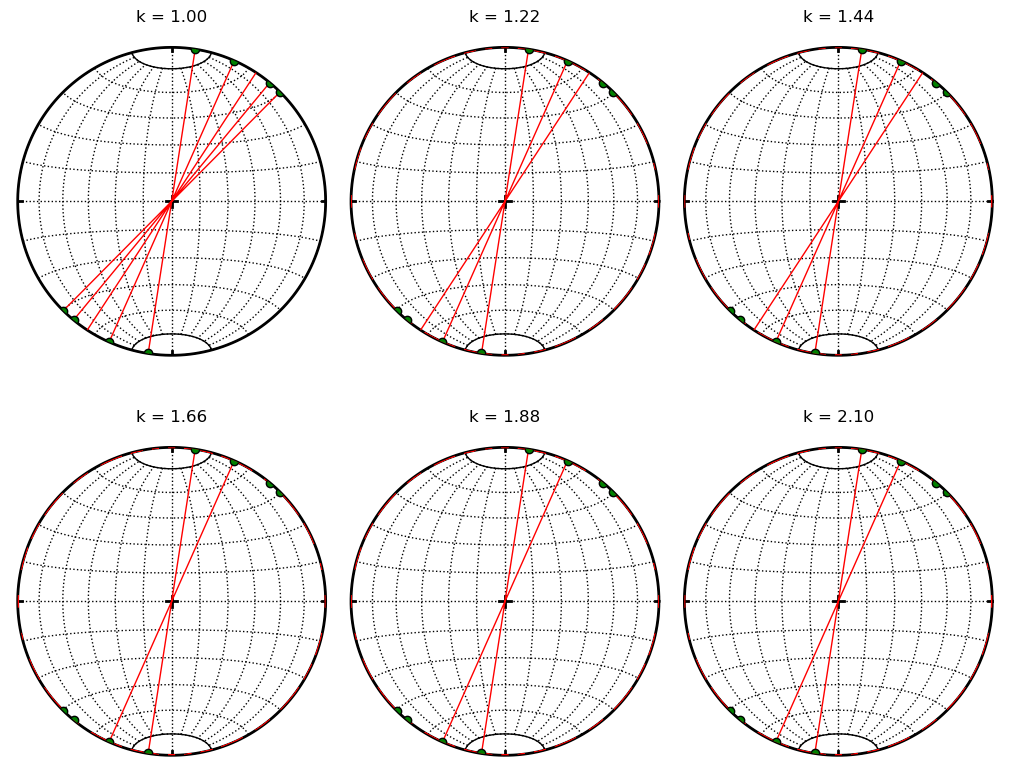

In [13]:
# inicia subplots no APSG
fig = plt.figure(constrained_layout=True, figsize=(10, 8))
subfigs = fig.subfigures(nrows=2, ncols=3)


# valores para variar em k
ks = np.linspace(1, 2.1, 6) # 1., 1.2, 1.4, 1.6, 1.8, 2.


# valores para variar angulo de cisalhamento
# 0, 15, 30, 45, 60, 75
psis = np.arange(1, 91, 20)

# Entra no loop dos valores de compressão uniaxial:
nrow=0
ncol=0

for i in range(len(ks)):

    
    k = ks[i]
    #Define matriz de achatamento vertical uniaxal em Z
    UC = np.array([[1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 1/k]])
    
    # para cada valor de compressão uniaxial vamos variar os ângulos de cisalhamento
    Xs=[]
    Ys=[]
    Zs=[]
    for j in range(len(psis)):
        
        psi = psis[j] # angulo de cisalhamento (graus)
        g = np.tan(np.deg2rad(psi)) # gamma = tan(psi)
        # Define matriz de cisalhamento simples
        CS = np.array([[1, g, 0],
                       [0, 1, 0],
                       [0, 0, 1]])

        F = np.matmul(CS, UC) # Matriz de Transformação final F = CS*UC
        C = np.matmul((np.linalg.inv(F)).T, np.linalg.inv(F)) # Calcula o Tensor de Cauchy (c)

        v1, v2, v3 = eig_vecs(C) # calcula os autovalores 
        
        # Define classe de 
        X = lin(vec(v1)); Xs.append(X)
        Y = lin(vec(v2)); Ys.append(Y)
        Z = lin(vec(v3)); Zs.append(Z)

        
    # Plota scatter dos pontos
    s = StereoNet(title='k = %0.2f' %(ks[i]))
    # Plota grande círculo da foliação
    s.great_circle(linset(Xs).cross(linset(Ys)), color='red', ls='-', lw=1)
    # Plota lineação que é dado pelo Eixo X
    s.line(linset(Xs),  markersize=6, mfc='green', mec='black')
    # render para o eixo
    s.render2fig(subfigs[nrow,ncol])
    #------------------------------------------------------------------------
    
    
    ncol=ncol+1
    if i==2:
        nrow=nrow+1
        ncol=0
        
    

plt.tight_layout()
#fig.savefig('stereograms_simples_compressao.png', format='png', dpi=450)

## Compressão Uniaxial e Cisalhamento Puro

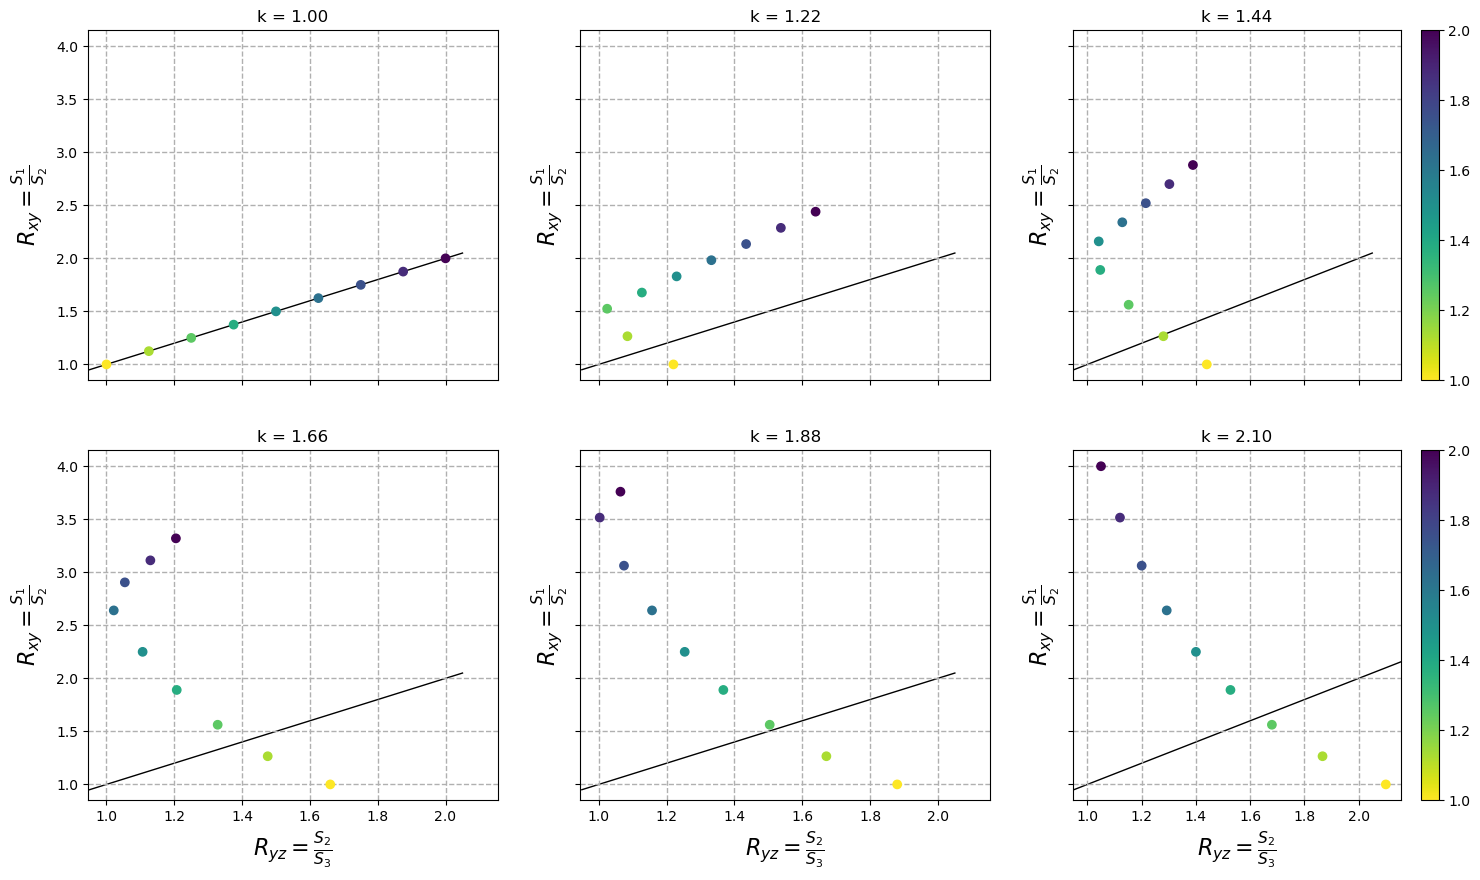

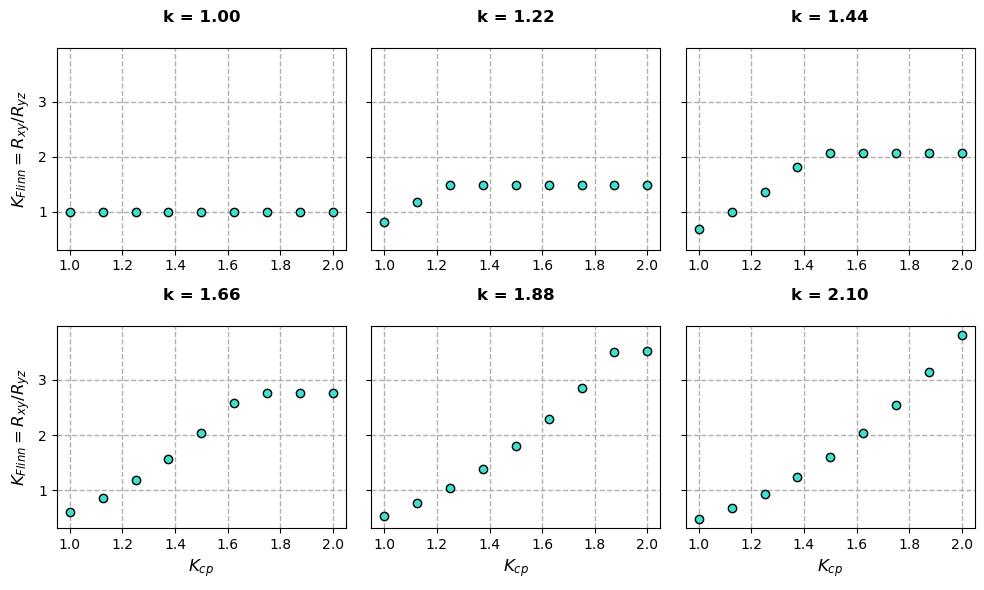

In [70]:
# Definição de figuras
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,10), sharex=True, sharey=True)
f2, ax2 = plt.subplots(nrows=2, ncols=3, figsize=(10,6), sharex=False, sharey=True)

#colormap = cm.get_cmap('autumn_r', 6)


# listas para guardar valores
k_values = []
psi_values = []
S1_values = []
S2_values = []
S3_values = []
V1_values = []
V2_values = []
V3_values = []

# valores para variar em k
ks = np.linspace(1, 2.1, 6) # 1., 1.2, 1.4, 1.6, 1.8, 2.


# valores para o fator de Cisalhamento puro
Kx = np.linspace(1, 2, 9)

# Entra no loop dos valores de compressão uniaxial:
nrow=0
ncol=0

for i in range(len(ks)):

    
    k = ks[i]
    #Define matriz de achatamento vertical uniaxal em Z
    UC = np.array([[1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 1/k]])
    
    s1s2 = [] # guarda razão s1/s2
    s2s3 = [] # guarda razão s2/s3
    
    Kf = [] # guarda valor de K-Flinn
    
    # para cada valor de compressão uniaxial vamos variar os ângulos de cisalhamento
    for j in range(len(Kx)):
        
        # fator de cisalhamento PURO
        k_cp = Kx[j]
        # Define matriz de cisalhamento PURO
        CP = np.array([[k_cp,      0, 0],
                       [   0, 1/k_cp, 0],
                       [   0,      0, 1]])

        F = np.matmul(CP, UC) # Matriz de Transformação final F = CS*UC
        C = np.matmul((np.linalg.inv(F)).T, np.linalg.inv(F)) # Calcula o Tensor de Cauchy (c)
        s1, s2, s3 = eig_values(C) # calcula os autovalores 
        
        s1s2.append(s1/s2)
        s2s3.append(s2/s3)
        
        k_flinn = ((s1/s2))/((s2/s3)) # Valor de k_flinn
        Kf.append(np.round(k_flinn,3))
        

    # Flinn Plot
    # Plota scatter dos pontos
    sc = ax[nrow,ncol].scatter(x=s2s3, y=s1s2, c=Kx, cmap='viridis_r', zorder=2)
    add_identity(ax[nrow,ncol], color='black', ls='-', lw=1, zorder=1) # Identity line
    
    #Configuarção do colobar
    if ncol==2:
        cbar = plt.colorbar(sc)
        #cbar.ax.set_title(r'$\Kx$')
        
    # Definição das figuras
    # Labels dos eixos
    ax[nrow,ncol].set_ylabel(r'$R_{xy}=\frac{S_1}{S_2}$', fontsize=16);
    if nrow==1:
        ax[nrow,ncol].set_xlabel(r'$R_{yz}=\frac{S_2}{S_3}$', fontsize=16);
    ax[nrow,ncol].set_title('k = %0.2f' %(ks[i]))
    ax[nrow,ncol].grid(True, ls='--', lw=1)
    

    #------------------------------------------------------------------------
    # Plota variação do K de Flinn
    ax2[nrow,ncol].plot(Kx, Kf, marker=".", mec='black', mfc='turquoise',
                       ms=12, lw=0)
    
    ax2[nrow,ncol].set_title('k = %0.2f\n' %(ks[i]), fontweight="bold")
    
    if nrow==1:
        ax2[nrow,ncol].set_xlabel(r'$K_{cp}$', fontsize=12);
    if ncol==0:
        ax2[nrow,ncol].set_ylabel(r'$K_{Flinn}=R_{xy}/R_{yz}$', fontsize=12);
        
    ax2[nrow,ncol].grid(True, ls='--', lw=1)
    #-------------------------------------------
    # Atualiza contadores
    ncol=ncol+1
    if i==2:
        nrow=nrow+1
        ncol=0
        

plt.tight_layout()
#f.savefig('eliipsoid_var_pure_shear_emX.png', format='png', dpi=650)
#f2.savefig('Kflinn_var_pureshear_emX.png', format='png', dpi=650)

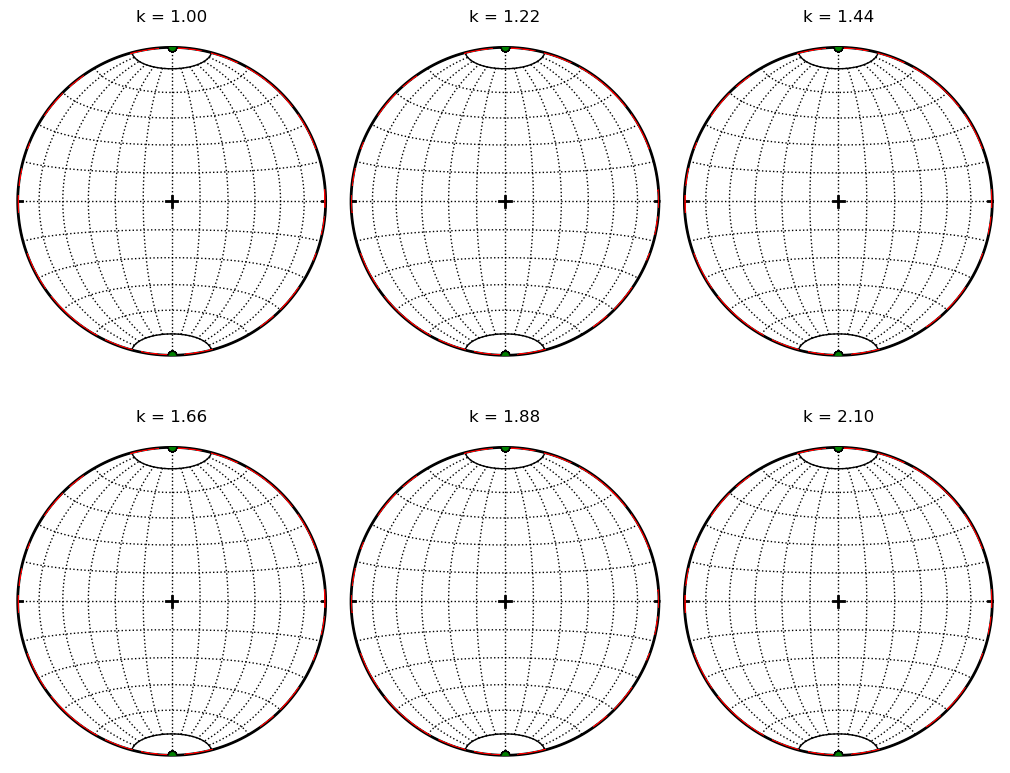

In [74]:
# inicia subplots no APSG
fig = plt.figure(constrained_layout=True, figsize=(10, 8))
subfigs = fig.subfigures(nrows=2, ncols=3)

# valores para variar em k
ks = np.linspace(1, 2.1, 6) # 1., 1.2, 1.4, 1.6, 1.8, 2.

# valores para o fator de Cisalhamento puro
Kx = np.linspace(1, 2, 9)

# Entra no loop dos valores de compressão uniaxial:
nrow=0
ncol=0

for i in range(len(ks)):

    k = ks[i]
    #Define matriz de achatamento vertical uniaxal em Z
    UC = np.array([[1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 1/k]])
    
    # para cada valor de compressão uniaxial vamos variar os ângulos de cisalhamento
    Xs=[]
    Ys=[]
    Zs=[]
    for j in range(len(Kx)):
        
        K_cp = Kx[j] # angulo de cisalhamento (graus)
        
        # Define matriz de cisalhamento puro
        CP = np.array([[k_cp,      0, 0],
                       [   0, 1, 0],
                       [   0,      0, 1/k_cp]])

        F = np.matmul(CP, UC) # Matriz de Transformação final F = CS*UC
        C = np.matmul((np.linalg.inv(F)).T, np.linalg.inv(F)) # Calcula o Tensor de Cauchy (c)

        v1, v2, v3 = eig_vecs(C) # calcula os autovalores 
        
        # Define classe de 
        X = lin(vec(v1)); Xs.append(X)
        Y = lin(vec(v2)); Ys.append(Y)
        Z = lin(vec(v3)); Zs.append(Z)

        
    # Plota scatter dos pontos
    s = StereoNet(title='k = %0.2f' %(ks[i]))
    # Plota grande círculo da foliação
    s.great_circle(linset(Xs).cross(linset(Ys)), color='red', ls='-', lw=1)
    # Plota lineação que é dado pelo Eixo X
    s.line(linset(Xs),  markersize=6, mfc='green', mec='black')
    # render para o eixo
    s.render2fig(subfigs[nrow,ncol])
    #------------------------------------------------------------------------
    
    
    ncol=ncol+1
    if i==2:
        nrow=nrow+1
        ncol=0
        
    

plt.tight_layout()
#fig.savefig('stereograms_puro_compressao_emX.png', format='png', dpi=450)